In [0]:
# APJC CSC Ignite 2019
# First Jupyter Notebook Exercise
# Maint : Lee Man Wei
# 2019 Sep 18

# Practice is to include all libraries at the top
# Standard Library
import numpy as np

# Third Part
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow import keras 

# Local Applications


tf.__version__

'1.14.0'

In [0]:
# Loading the dataset for the Digits OCR
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data")
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train.shape)

print("Testing Data")
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test.shape)


Training data
60000
(60000, 28, 28)
60000
(60000,)
Testing Data
10000
(10000, 28, 28)
10000
(10000,)


In [0]:
X_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [0]:
y_train[3]

1

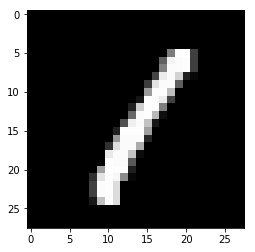

Tagged digit:  1


In [0]:
# Let's visualise how the train data looks like
index = 3
 
pred = X_train[index]
pred = pred.reshape([28, 28]);
plt.gray()
plt.imshow(pred)
plt.show()

print("Tagged digit: ", y_train[index])

In [0]:
#Scale the values by 255, so it is between 0 to 1
X_train_scale = X_train / 255.0
X_test_scale = X_test / 255.0

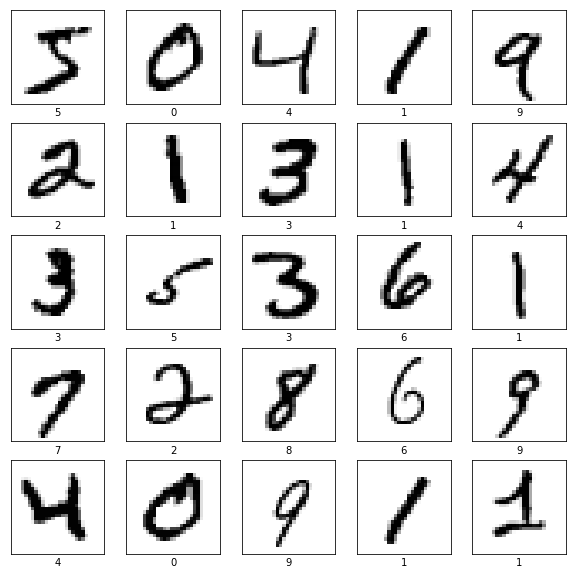

In [0]:
#Show the first 25 data in the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_scale[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [47]:
#The NN layer setting
#n_input = 784  # input layer (28x28 pixels)
#n_hidden1 = 512  # 1st hidden layer
#n_hidden2 = 256  # 2nd hidden layer
#n_hidden3 = 128  # 3rd hidden layer
#n_output = 10  # output layer (0-9 digits)
#learning_rate = 1e-4
#n_iterations = 1000
#batch_size = 128
#dropout = 0.5

#setup the model for training
model = keras.Sequential([
    # transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels.  No parameters to train
    keras.layers.Flatten(input_shape=(28, 28)),
    # 1st hidden layer
    keras.layers.Dense(32, activation=tf.nn.relu),
    # 2nd hidden layer
    keras.layers.Dense(16, activation=tf.nn.relu),
    # this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']  )

model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_16 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Let's run the training
history = model.fit(X_train_scale, y_train, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3804 - acc: 0.8885
Epoch 2/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1842 - acc: 0.9454
Epoch 3/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1465 - acc: 0.9563
Epoch 4/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1239 - acc: 0.9627
Epoch 5/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1078 - acc: 0.9678
Epoch 6/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0952 - acc: 0.9716
Epoch 7/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0854 - acc: 0.9741
Epoch 8/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0777 - acc: 0.9763
Epoch 9/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0714 - acc: 0.9778
Epoch 10/20
60000/60000 [==============================] - 3s 51us/sample - loss: 

In [49]:
# This eval the model against the test dataset
test_loss, test_acc = model.evaluate(X_test_scale, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.1372 - acc: 0.9654
Test accuracy: 0.9654


In [0]:

##  Run through the test dataset.  The prediction is output to the variable 'predictions'

predictions = model.predict(X_test_scale)

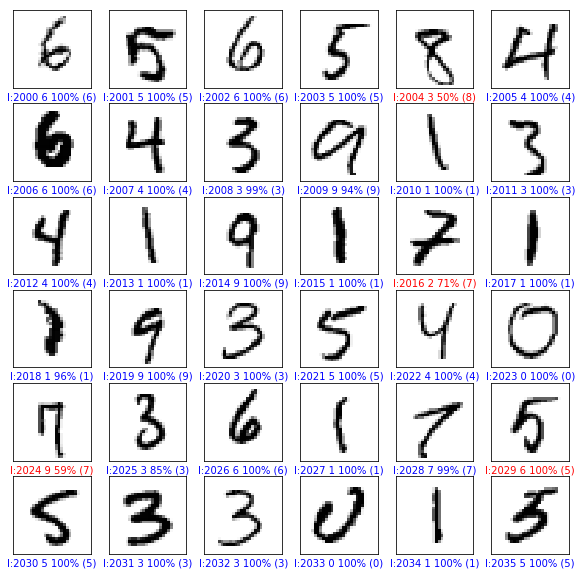

In [53]:
# Routines to help to plot the data
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("I:{} " "{} {:2.0f}% ({})".format(i, predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i,  predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([0,1,2,3,4,5,6,7,8,9])
    plt.yticks([0,0.5,1])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

##########################################

#Show25 data in the test set
offset = 2000

plt.figure(figsize=(10,10))
# for i in range(25):
for i in range(36):
    plt.subplot(6,6,i+1)
    plot_image(i+offset, predictions, y_test, X_test_scale)

plt.show()

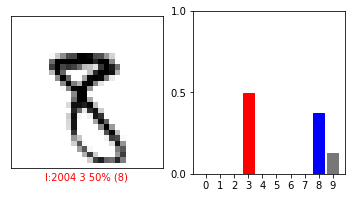

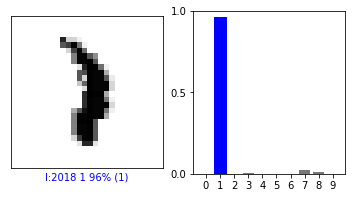

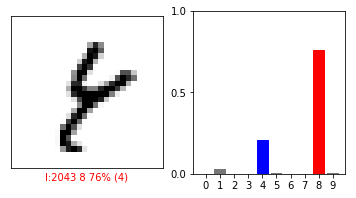

In [54]:
## some interesting dataset to see 2004, 2024,   2043,   
i = 2004
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test_scale)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

i = 2018
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test_scale)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

i = 2043
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test_scale)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

In [0]:
## To export the trained model

# Save entire model to a HDF5 file
model.save('my_model16.h5')